Unidade: **Engenharia de Atributos**

Tema: **Técnicas para Pré-processamento de Dados**

Autoria: **Orlando da Silva Junior**

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dados Experimentais

In [ ]:
# Lê e carrega os dados em memória
url_dados = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

dados = pd.read_csv(url_dados, header=None, sep=',', na_values=[' ?', '?', '? '], names=colunas)

In [ ]:
# Exibe as primeiras linhas do conjunto de dados
dados.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Exibe informações sobre o conjunto de dados carregado
# Observamos: volume de dados, nomes das colunas, tipos de dados e dados faltantes
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Eliminação de atributos

In [ ]:
# Remove o atributo 'fnlwgt'
dados.drop('fnlwgt', axis=1, inplace=True)

# Remove o atributo 'relationship'
#dados2 = dados.drop('relationship', axis=1, inplace=False)

In [ ]:
dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Tratamento de dados desbalanceados

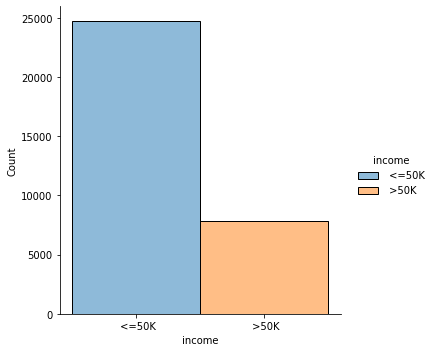

In [ ]:
# Plota a distribuição de classes
sns.displot(dados, x="income", hue="income")
plt.show()

In [ ]:
# Divide o conjunto de dados pelas duas classes
class_menor50 = dados[dados['income'] == ' <=50K']
class_maior50 = dados[dados['income'] == ' >50K']

# Exibe a quantidade de dados por classe
print("<=50K:", len(class_menor50))
print(">50K :", len(class_maior50))

<=50K: 24720
>50K : 7841


In [ ]:
# Equilibra a classe majoritária (<=50)
# conforme o tamanho da classe minoritária (>50)
nova_class_menor50 = class_menor50.sample(len(class_maior50))
novos_dados = pd.concat([nova_class_menor50, class_maior50], axis=0)
novos_dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6230,31,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
4435,40,NaN,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,30,United-States,<=50K
7522,54,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
30508,38,Private,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,0,0,32,United-States,<=50K
268,33,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K


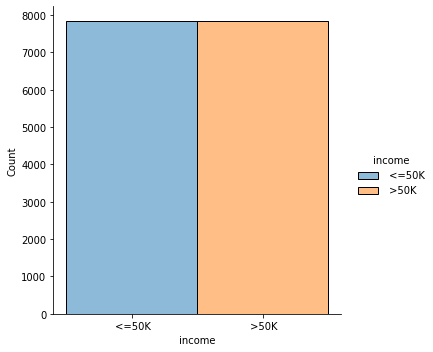

In [ ]:
# Plota a nova distribuição de classes
sns.displot(novos_dados, x="income", hue="income")
plt.show()

## Tratamento de dados ruidosos

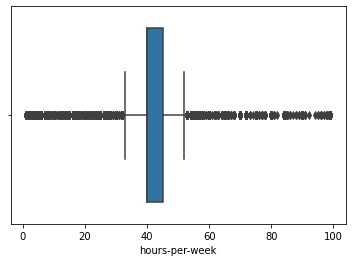

In [ ]:
# Identificando ruído no atributo 'hours-per-week'
sns.boxplot(data=dados, x="hours-per-week")
plt.show()

In [ ]:
# Identifica os objetos ruidosos no conjunto de dados
x = stats.zscore(dados['hours-per-week'])
print("Ruídos: ", len(dados[np.abs(x) > 3]))

Ruídos:  440


In [ ]:
# Substitui o valor ruidoso pelo valor médio do atributo
dados.loc[np.abs(x) > 3, 'hours-per-week'] = int(np.mean(dados['hours-per-week']))

## Transformação de um valor simbólico nominal para numérico

In [ ]:
# Transforma os valores nominais do
# atributo binário 'income' em valores numéricos
dados['income-num'] = dados['income'].map({" <=50K": 0, " >50K": 1})
dados.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [ ]:
# Transforma os valores nominais do
# atributo binário 'race' em valores numéricos
trans_dados = pd.get_dummies(dados[['race']])
trans_dados = pd.concat([dados['race'], trans_dados], axis=1)
trans_dados.head()

,race,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,White,0,0,0,0,1
1,White,0,0,0,0,1
2,White,0,0,0,0,1
3,Black,0,0,1,0,0
4,Black,0,0,1,0,0


## Transformação de um valor numérico para simbólico

In [ ]:
# Transforma os valores numéricos do
# atributo 'education-num' em valores nominais
dados['education-num-nominal'] = dados['education-num'].map(
                             {1 : ' Preschool',
                              2 : ' 1st-4th',
                              3 : ' 5th-6th',
                              4 : ' 7th-8th',
                              5 : ' 9th',
                              6 : ' 10th',
                              7 : ' 11th',
                              8 : ' 12th',
                              9 : ' HS-grad',
                              10: ' Some-college',
                              11: ' Assoc-voc',
                              12: ' Assoc-acdm',
                              13: ' Bachelors',
                              14: ' Masters',
                              15: ' Prof-school',
                              16: ' Doctorate'})

dados[['education', 'education-num', 'education-num-nominal']].head()

,education,education-num,education-num-nominal
0,Bachelors,13,Bachelors
1,Bachelors,13,Bachelors
2,HS-grad,9,HS-grad
3,11th,7,11th
4,Bachelors,13,Bachelors
